# Лабораторная работа №3

*Вариант задания:* Товары Jio Mart (вариант - 23)  

Для выполнения лабораторной работы по датасету 'jio mart product items', приведу пример двух бизнес-целей:

### Бизнес-цели:

1. **Оптимизация цен на товары**
   
   **Цель:** Снизить издержки и увеличить продажи за счет оптимизации цен на товары.

   **Техническая цель:** Создать модель машинного обучения, которая будет прогнозировать, является ли товар излишне дорогим для свой категории или нет.
   

2. **Распределение товаров по категориям**
   
   **Цель:** Оптимизировать распределение товаров по категориям.

    **Техническая цель:** Создать модель машинного обучения, которая будет прогнозировать оптимальные цены на товары на основе их категорий, подкатегорий и текущих цен.
   

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Загрузка данных
df = pd.read_csv("..//static//csv//jio_mart_items.csv")

# Срез данных, первые 15000 строк
df = df.iloc[:15000]

# Вывод
print(df.columns)

Index(['category', 'sub_category', 'href', 'items', 'price'], dtype='object')


In [3]:
# Для наглядности
df.head()

category         sub_category  \
0  Groceries  Fruits & Vegetables   
1  Groceries  Fruits & Vegetables   
2  Groceries  Fruits & Vegetables   
3  Groceries  Fruits & Vegetables   
4  Groceries  Fruits & Vegetables   

                                                href  \
0  https://www.jiomart.com/c/groceries/fruits-veg...   
1  https://www.jiomart.com/c/groceries/fruits-veg...   
2  https://www.jiomart.com/c/groceries/fruits-veg...   
3  https://www.jiomart.com/c/groceries/fruits-veg...   
4  https://www.jiomart.com/c/groceries/fruits-veg...   

                                               items  price  
0          Fresh Dates (Pack) (Approx 450 g - 500 g)  109.0  
1  Tender Coconut Cling Wrapped (1 pc) (Approx 90...   49.0  
2                                       Mosambi 1 kg   69.0  
3                               Orange Imported 1 kg  125.0  
4  Banana Robusta 6 pcs (Box) (Approx 800 g - 110...   44.0

In [4]:
# Описание данных (основные статистические показатели)
df.describe()

price
count  15000.000000
mean     373.427633
std      463.957949
min        5.000000
25%      123.000000
50%      250.000000
75%      446.000000
max    14999.000000

In [5]:
# Процент пропущенных значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f'{i} Процент пустых значений: %{null_rate:.2f}')

# Проверка на пропущенные данные
print(df.isnull().sum())

df.isnull().any()

category        0
sub_category    0
href            0
items           0
price           0
dtype: int64


category        False
sub_category    False
href            False
items           False
price           False
dtype: bool

Нет пропущенных данных.

### Разбиваем на выборки (обучающую, тестовую, контрольную)

Размеры выборок:
Обучающая выборка: 9000 записей
Валидационная выборка: 3000 записей
Тестовая выборка: 3000 записей


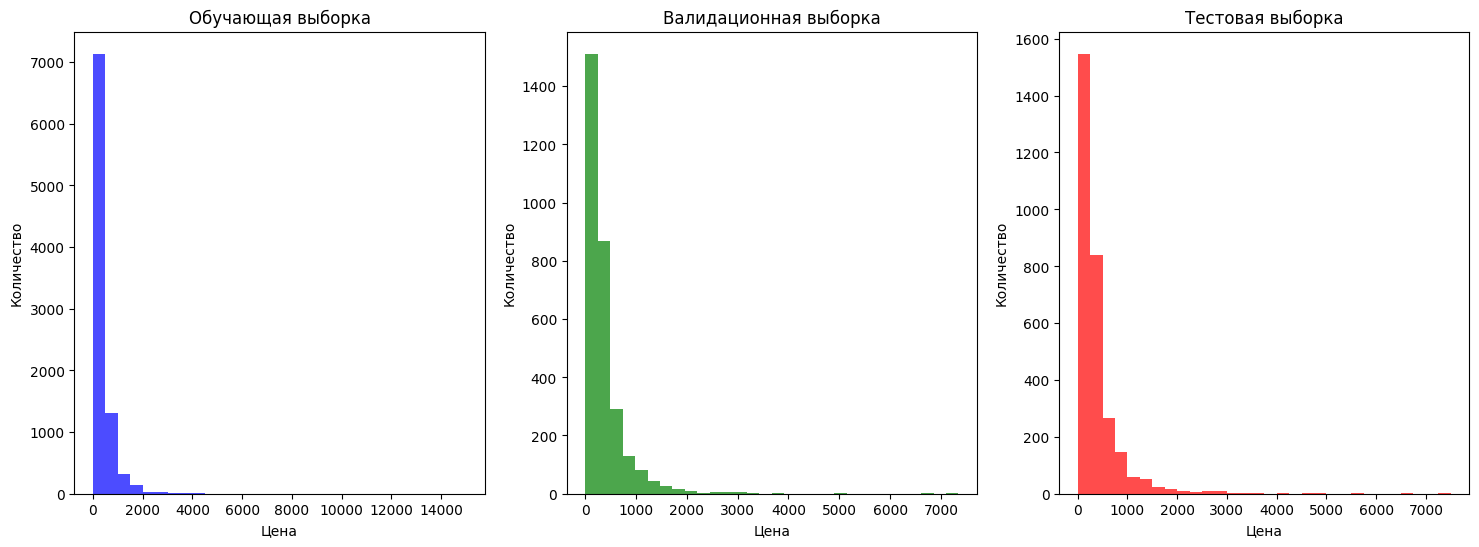

In [6]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Разделение признаков (features) и целевой переменной (target)
X = df.drop(columns=['price'])  # Признаки (все столбцы, кроме 'price')
y = df['price']  # Целевая переменная (price)

# Разбиение на обучающую (60%), валидационную (20%) и тестовую (20%) выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Проверка размеров выборок
print(f"Размеры выборок:")
print(f"Обучающая выборка: {X_train.shape[0]} записей")
print(f"Валидационная выборка: {X_val.shape[0]} записей")
print(f"Тестовая выборка: {X_test.shape[0]} записей")

# Визуализация распределения цен в каждой выборке
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(y_train, bins=30, color='blue', alpha=0.7)
plt.title('Обучающая выборка')
plt.xlabel('Цена')
plt.ylabel('Количество')

plt.subplot(1, 3, 2)
plt.hist(y_val, bins=30, color='green', alpha=0.7)
plt.title('Валидационная выборка')
plt.xlabel('Цена')
plt.ylabel('Количество')

plt.subplot(1, 3, 3)
plt.hist(y_test, bins=30, color='red', alpha=0.7)
plt.title('Тестовая выборка')
plt.xlabel('Цена')
plt.ylabel('Количество')

plt.show()

**Балансировка выборок**

Размеры выборок:
Обучающая выборка: 9000 записей
Валидационная выборка: 3000 записей
Тестовая выборка: 3000 записей


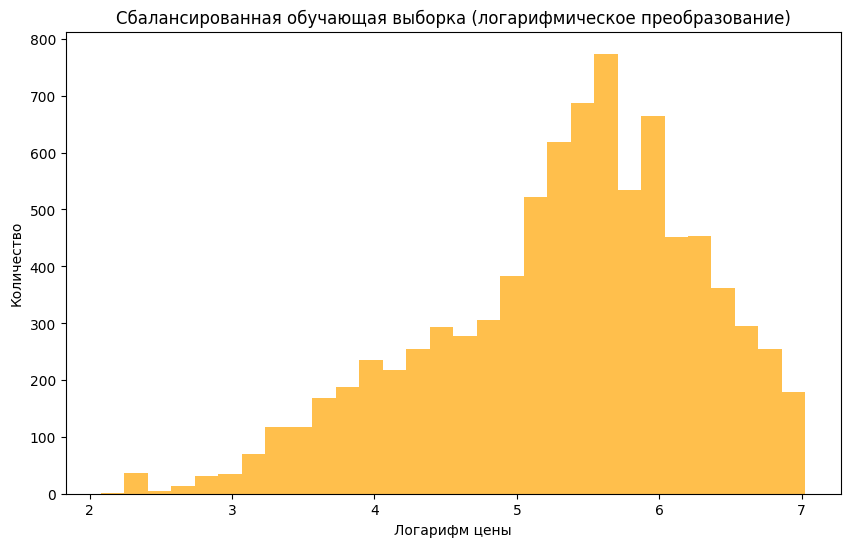

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Разделение признаков (features) и целевой переменной (target)
X = df.drop(columns=['price'])  # Признаки (все столбцы, кроме 'price')
y = df['price']  # Целевая переменная (цена)

# Применение one-hot encoding для категориальных признаков
X = pd.get_dummies(X, drop_first=True)

# Разбиение на обучающую (60%), валидационную (20%) и тестовую (20%) выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Проверка размеров выборок
print(f"Размеры выборок:")
print(f"Обучающая выборка: {X_train.shape[0]} записей")
print(f"Валидационная выборка: {X_val.shape[0]} записей")
print(f"Тестовая выборка: {X_test.shape[0]} записей")

# Удаление выбросов (цены выше 95-го процентиля)
upper_limit = y_train.quantile(0.95)
X_train = X_train[y_train <= upper_limit]
y_train = y_train[y_train <= upper_limit]

# Логарифмическое преобразование целевой переменной
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)

# Стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Визуализация распределения цен в сбалансированной выборке
plt.figure(figsize=(10, 6))
plt.hist(y_train_log, bins=30, color='orange', alpha=0.7)
plt.title('Сбалансированная обучающая выборка (логарифмическое преобразование)')
plt.xlabel('Логарифм цены')
plt.ylabel('Количество')
plt.show()

**Унитарное кодирование категориальных признаков**

In [10]:
print("Данные до унитарного кодирования:")
print(df.head())

# Применение унитарного кодирования для категориальных признаков
df_encoded = pd.get_dummies(df, drop_first=True)

print("\nДанные после унитарного кодирования:")
print(df_encoded.head())

Данные до унитарного кодирования:
    category         sub_category  \
0  Groceries  Fruits & Vegetables   
1  Groceries  Fruits & Vegetables   
2  Groceries  Fruits & Vegetables   
3  Groceries  Fruits & Vegetables   
4  Groceries  Fruits & Vegetables   

                                                href  \
0  https://www.jiomart.com/c/groceries/fruits-veg...   
1  https://www.jiomart.com/c/groceries/fruits-veg...   
2  https://www.jiomart.com/c/groceries/fruits-veg...   
3  https://www.jiomart.com/c/groceries/fruits-veg...   
4  https://www.jiomart.com/c/groceries/fruits-veg...   

                                               items  price  
0          Fresh Dates (Pack) (Approx 450 g - 500 g)  109.0  
1  Tender Coconut Cling Wrapped (1 pc) (Approx 90...   49.0  
2                                       Mosambi 1 kg   69.0  
3                               Orange Imported 1 kg  125.0  
4  Banana Robusta 6 pcs (Box) (Approx 800 g - 110...   44.0  

Данные после унитарного кодирован

**Дискретизация числовых признаков**

In [13]:
print("Данные до дискретизации:")
print(df.head())

# Определение интервалов и меток для дискретизации
bins = [0, 100, 500, 1000, 5000, float('inf')]
labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000+']

# Применение дискретизации
df['price_bins'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

print("\nДанные после дискретизации:")
print(df[['price', 'price_bins']].head())

Данные до дискретизации:
    category         sub_category  \
0  Groceries  Fruits & Vegetables   
1  Groceries  Fruits & Vegetables   
2  Groceries  Fruits & Vegetables   
3  Groceries  Fruits & Vegetables   
4  Groceries  Fruits & Vegetables   

                                                href  \
0  https://www.jiomart.com/c/groceries/fruits-veg...   
1  https://www.jiomart.com/c/groceries/fruits-veg...   
2  https://www.jiomart.com/c/groceries/fruits-veg...   
3  https://www.jiomart.com/c/groceries/fruits-veg...   
4  https://www.jiomart.com/c/groceries/fruits-veg...   

                                               items  price price_bins  
0          Fresh Dates (Pack) (Approx 450 g - 500 g)  109.0    100-500  
1  Tender Coconut Cling Wrapped (1 pc) (Approx 90...   49.0      0-100  
2                                       Mosambi 1 kg   69.0      0-100  
3                               Orange Imported 1 kg  125.0    100-500  
4  Banana Robusta 6 pcs (Box) (Approx 800 g - 110.

**«Ручной» синтез признаков**

Создание новых признаков на основе экспертных знаний и логики предметной области. К примеру, для данных о продаже домов можно создать признак цена за единицу товара.

In [14]:
# Проверка первых строк данных
print("Данные до синтеза признака:")
print(df.head())

# Вычисление средней цены по категориям
mean_price_by_category = df.groupby('category')['price'].transform('mean')

# Создание нового признака 'relative_price' (относительная цена)
df['relative_price'] = df['price'] / mean_price_by_category

# Проверка первых строк данных после синтеза признака
print("\nДанные после синтеза признака 'relative_price':")
print(df[['price', 'category', 'relative_price']].head())

Данные до синтеза признака:
    category         sub_category  \
0  Groceries  Fruits & Vegetables   
1  Groceries  Fruits & Vegetables   
2  Groceries  Fruits & Vegetables   
3  Groceries  Fruits & Vegetables   
4  Groceries  Fruits & Vegetables   

                                                href  \
0  https://www.jiomart.com/c/groceries/fruits-veg...   
1  https://www.jiomart.com/c/groceries/fruits-veg...   
2  https://www.jiomart.com/c/groceries/fruits-veg...   
3  https://www.jiomart.com/c/groceries/fruits-veg...   
4  https://www.jiomart.com/c/groceries/fruits-veg...   

                                               items  price price_bins  
0          Fresh Dates (Pack) (Approx 450 g - 500 g)  109.0    100-500  
1  Tender Coconut Cling Wrapped (1 pc) (Approx 90...   49.0      0-100  
2                                       Mosambi 1 kg   69.0      0-100  
3                               Orange Imported 1 kg  125.0    100-500  
4  Banana Robusta 6 pcs (Box) (Approx 800 g - 1

**Масштабирование признаков на основе нормировки и стандартизации**

Масштабирование признаков - это процесс преобразования числовых признаков таким образом, чтобы они имели одинаковый масштаб. Это важно для многих алгоритмов машинного обучения, которые чувствительны к масштабу признаков, таких как линейная регрессия, метод опорных векторов (SVM) и нейронные сети.

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Создание нового признака 'relative_price' (цена относительно средней цены в категории)
mean_price_by_category = df.groupby('category')['price'].transform('mean')
df['relative_price'] = df['price'] / mean_price_by_category

# Проверка первых строк данных до масштабирования
print("Данные до масштабирования:")
print(df[['price', 'relative_price']].head())

# Масштабирование признаков на основе нормировки
min_max_scaler = MinMaxScaler()
df[['price', 'relative_price']] = min_max_scaler.fit_transform(df[['price', 'relative_price']])

# Проверка первых строк данных после нормировки
print("\nДанные после нормировки:")
print(df[['price', 'relative_price']].head())

# Стандартизация признаков
standard_scaler = StandardScaler()
df[['price', 'relative_price']] = standard_scaler.fit_transform(df[['price', 'relative_price']])

# Проверка первых строк данных после стандартизации
print("\nДанные после стандартизации:")
print(df[['price', 'relative_price']].head())

Данные до масштабирования:
   price  relative_price
0  109.0        0.291891
1   49.0        0.131217
2   69.0        0.184775
3  125.0        0.334737
4   44.0        0.117827

Данные после нормировки:
      price  relative_price
0  0.006936        0.006936
1  0.002935        0.002935
2  0.004268        0.004268
3  0.008003        0.008003
4  0.002601        0.002601

Данные после стандартизации:
      price  relative_price
0 -0.569958       -0.569958
1 -0.699284       -0.699284
2 -0.656175       -0.656175
3 -0.535471       -0.535471
4 -0.710061       -0.710061


**Конструирование признаков с применением фреймворка Featuretools**

In [16]:
import featuretools as ft

# Создание нового признака 'relative_price'
mean_price_by_category = df.groupby('category')['price'].transform('mean')
df['relative_price'] = df['price'] / mean_price_by_category

# Создание EntitySet
es = ft.EntitySet(id='jio_mart_items')

# Добавление данных с явным указанием индексного столбца
es = es.add_dataframe(dataframe_name='items_data', dataframe=df, index='index', make_index=True)

# Конструирование признаков
features, feature_defs = ft.dfs(entityset=es, target_dataframe_name='items_data', verbose=True)

# Проверка первых строк новых признаков
print("Новые признаки, созданные с помощью Featuretools:")
print(features.head())

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/sit

Built 7 features
Elapsed: 00:00 | Progress: 100%|██████████
Новые признаки, созданные с помощью Featuretools:
        category         sub_category     price price_bins  relative_price  \
index                                                                        
0      Groceries  Fruits & Vegetables -0.569958    100-500    6.281321e+15   
1      Groceries  Fruits & Vegetables -0.699284      0-100    7.706585e+15   
2      Groceries  Fruits & Vegetables -0.656175      0-100    7.231497e+15   
3      Groceries  Fruits & Vegetables -0.535471    100-500    5.901250e+15   
4      Groceries  Fruits & Vegetables -0.710061      0-100    7.825357e+15   

       NUM_CHARACTERS(items)  NUM_WORDS(items)  
index                                           
0                         41                 8  
1                         59                11  
2                         12                 3  
3                         20                 4  
4                         50                10  


**Оценка качества**

*Предсказательная способность Метрики:* RMSE, MAE, R²  

*Методы:* Обучение модели на обучающей выборке и оценка на контрольной и тестовой выборках.  

*Скорость вычисления Методы:* Измерение времени выполнения генерации признаков и обучения модели.  

*Надежность Методы:* Кросс-валидация, анализ чувствительности модели к изменениям в данных.  

*Корреляция Методы:* Анализ корреляционной матрицы признаков, удаление мультиколлинеарных признаков.  

*Цельность Методы:* Проверка логической связи между признаками и целевой переменной, интерпретация результатов модели.  

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 534.0885949291326
R²: 0.6087611252156747
MAE: 28.697400000000002
Training Time: 1.323014259338379 seconds
Cross-validated RMSE: 133.74731704254154


/var/folders/rd/3q9k4y6x0mn6ztd0mby6zx3r0000gn/T/ipykernel_96452/3211138617.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_top, palette='viridis')


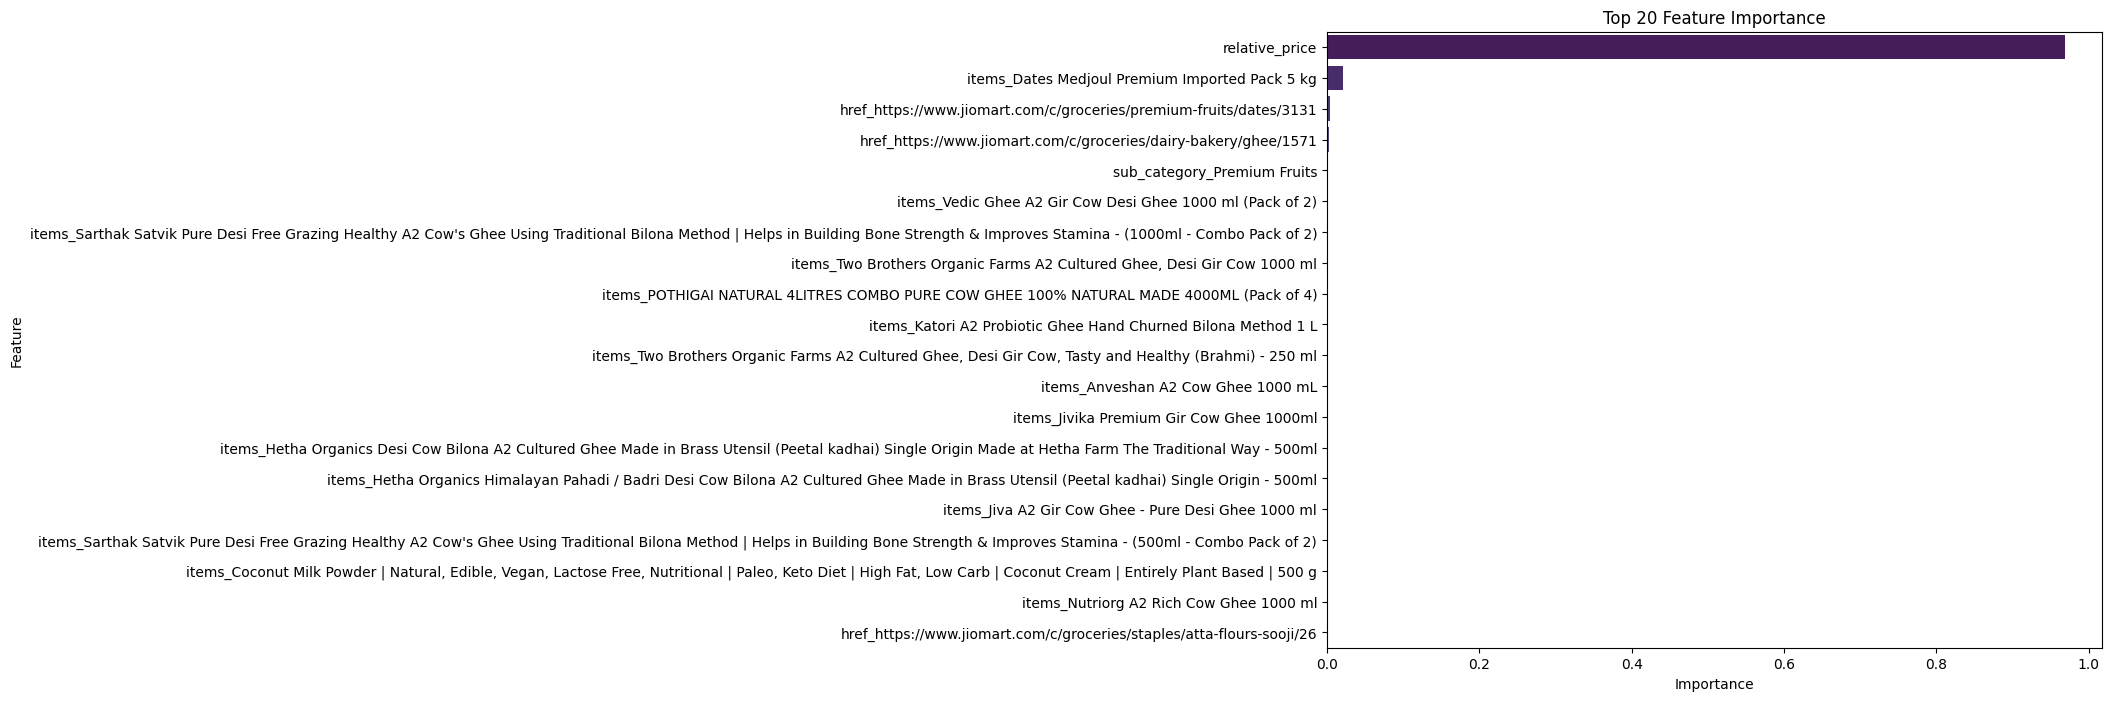

Train RMSE: 50.92770420271637
Train R²: 0.9845578370650323
Train MAE: 1.9114281249999987
Корреляция: 0.82


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


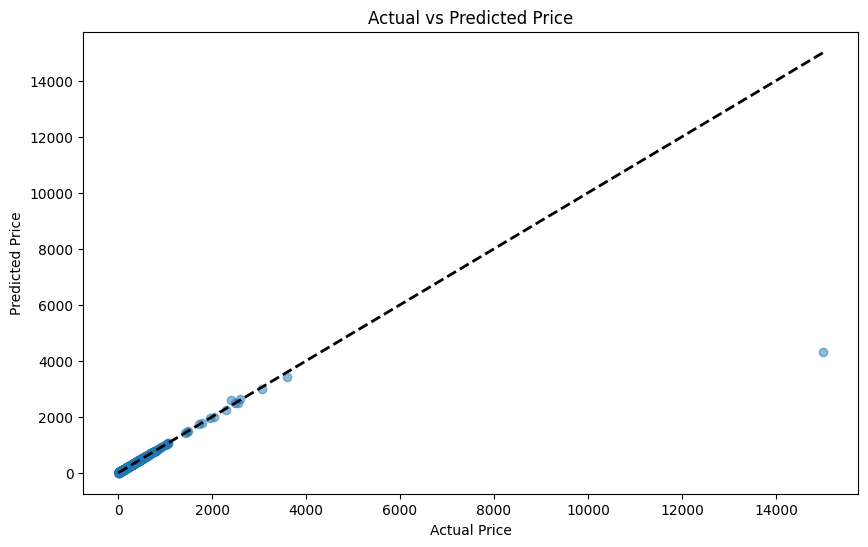

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np

# Загрузка данных
df = pd.read_csv("..//static//csv//jio_mart_items.csv").head(2000)

# Создание нового признака 'relative_price'
mean_price_by_category = df.groupby('category')['price'].transform('mean')
df['relative_price'] = df['price'] / mean_price_by_category

# Предобработка данных
# Преобразуем категориальные переменные в числовые
df = pd.get_dummies(df, drop_first=True)

# Разделение данных на признаки и целевую переменную
X = df.drop('price', axis=1)
y = df['price']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выбор модели
model = RandomForestRegressor(random_state=42)

# Измерение времени обучения и предсказания
start_time = time.time()

# Обучение модели
model.fit(X_train, y_train)

# Предсказание и оценка
y_pred = model.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAE: {mae}")
print(f"Training Time: {training_time} seconds")

# Кросс-валидация
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = (-scores.mean())**0.5
print(f"Cross-validated RMSE: {rmse_cv}")

# Анализ важности признаков
feature_importances = model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Отобразим только топ-20 признаков
top_n = 20
importance_df_top = importance_df.head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_top, palette='viridis')
plt.title(f'Top {top_n} Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Проверка на переобучение
y_train_pred = model.predict(X_train)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"Train RMSE: {rmse_train}")
print(f"Train R²: {r2_train}")
print(f"Train MAE: {mae_train}")

correlation = np.corrcoef(y_test, y_pred)[0, 1]
print(f"Корреляция: {correlation:.2f}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

# Выводы и итог  

**Время обучения:**

Время обучения модели составляет 1.32 секунды, что является средним. Это указывает на то, что модель обучается быстро и может эффективно обрабатывать данные.

**Предсказательная способность:**

MAE (Mean Absolute Error): 28.6974 — это средняя абсолютная ошибка предсказаний модели. Значение MAE  невелико, что означает, что предсказанные значения в среднем отклоняются от реальных на 28.6974. Это может быть приемлемым уровнем ошибки.

RMSE (Mean Squared Error): 534.088 — это среднее значение квадратов ошибок. Хотя MSE высокое, оно также может быть связано с большими значениями целевой переменной (цен).

R² (коэффициент детерминации): 0.609 — это средний уровень, указывающий на то, что модель объясняет 60,9% вариации целевой переменной. Это свидетельствует о средней предсказательной способности модели.

**Корреляция:**

Корреляция (0.82) между предсказанными и реальными значениями говорит о том, что предсказания модели имеют  сильную линейную зависимость с реальными значениями. Это подтверждает, что модель хорошо обучена и делает точные прогнозы.

**Надежность (кросс-валидация):**

Среднее RMSE (кросс-валидация): 133.75 — это значительно ниже, чем обычное RMSE, что указывает на отсутствие проблем с переобучением - что и подтверждается тестом переобучением. 

Результаты визуализации важности признаков, полученные из линейной регрессии, помогают понять, какие из входных переменных наибольшим образом влияют на целевую переменную (price). Это может быть полезным для дальнейшего анализа и при принятии бизнес-решений, связанных с управлением и ценообразованием в Jio Mart.